Chloe Quinto     
CPE 695     
HW 3    
I pledge my honor that I have abided by the Stevens Honor System - Chloe Quinto     

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from keras.utils import to_categorical 
from numpy import array
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics 
# from sklearn.preprocessing import OneHotEncoder

### 1. read in Titanic.csv and observe a few samples, some features are categorical and others are numerical. Take a random 70% samples for training and the rest 30% for test.

In [2]:
df = pd.read_csv('titanic.csv', header = 0)
df.head(10)

Unnamed: 0 pclass  survived                             name     sex  \
0           1    1st         1    Allen, Miss. Elisabeth Walton  female   
1           2    1st         1   Allison, Master. Hudson Trevor    male   
2           3    1st         0     Allison, Miss. Helen Loraine  female   
3           4    1st         0  Allison, Mr. Hudson Joshua Crei    male   
4           5    1st         0  Allison, Mrs. Hudson J C (Bessi  female   
5           6    1st         1              Anderson, Mr. Harry    male   
6           7    1st         1  Andrews, Miss. Kornelia Theodos  female   
7           8    1st         0           Andrews, Mr. Thomas Jr    male   
8           9    1st         1  Appleton, Mrs. Edward Dale (Cha  female   
9          10    1st         0          Artagaveytia, Mr. Ramon    male   

       age  sibsp  parch    ticket        fare    cabin     embarked boat  \
0  29.0000      0      0     24160  211.337494       B5  Southampton    2   
1   0.9167      1      2    113781  151.550003  C22 C26  Southampton   11   
2   2.0000      1      2    113781  151.550003  C22 C26  Southampton  NaN   
3  30.0000      1      2    113781  151.550003  C22 C26  Southampton  NaN   
4  25.0000      1      2    113781  151.550003  C22 C26  Southampton  NaN   
5  48.0000      0      0     19952   26.549999      E12  Southampton    3   
6  63.0000      1      0     13502   77.958298       D7  Southampton   10   
7  39.0000      0      0    112050    0.000000      A36  Southampton  NaN   
8  53.0000      2      0     11769   51.479198     C101  Southampton    D   
9  71.0000      0      0  PC 17609   49.504200      NaN    Cherbourg  NaN   

    body                        home.dest  
0    NaN                     St Louis, MO  
1    NaN  Montreal, PQ / Chesterville, ON  
2    NaN  Montreal, PQ / Chesterville, ON  
3  135.0  Montreal, PQ / Chesterville, ON  
4    NaN  Montreal, PQ / Chesterville, ON  
5    NaN                     New York, NY  
6    NaN                       Hudson, NY  
7    NaN                      Belfast, NI  
8    NaN              Bayside, Queens, NY  
9   22.0              Montevideo, Uruguay

In [46]:
df.iloc[153]

Unnamed: 0                               154
pclass                                   1st
survived                                   1
name          Hays, Miss. Margaret Bechstein
sex                                   female
age                                       24
sibsp                                      0
parch                                      0
ticket                                 11767
fare                                 83.1583
cabin                                    C54
embarked                           Cherbourg
boat                                       7
body                                     NaN
home.dest                       New York, NY
Name: 153, dtype: object

In [11]:
df['survived'] = df["survived"].astype(int)

In [43]:
y = df["survived"]

feature_columns = ['pclass', "sex", "age", "sibsp"]
x = df[feature_columns].apply(LabelEncoder().fit_transform) 

Understanding LabelEcoder: 

| new label  | pclass  |
|---|---|
| 0  |  1st |
|  1 |  2nd  |
|  2 |  3rd |


| new label  | sex  |
|---|---|
| 0  |  male |
|  1 |  female  |


In [38]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.3, random_state=None)

In [39]:
xtrain

pclass  sex  age  sibsp
693       2    1   31      0
777       2    1   28      0
224       0    1   67      0
734       2    1    9      1
154       0    1   77      1
..      ...  ...  ...    ...
692       2    0   27      0
882       2    1  140      0
10        0    1   69      1
582       1    0   19      0
807       2    0   15      2

[916 rows x 4 columns]

As a note on random_state: 
    if None, the random number generate is the Random State instance used by np.random

Let's look at the shape of our data 

In [40]:
print("xtrain shape: ", xtrain.shape)
print("xtest shape: ", xtest.shape)
print('\n')
print("ytrain shape: ", ytrain.shape)
print("ytest shape: ", ytest.shape)

xtrain shape:  (916, 4)
xtest shape:  (393, 4)


ytrain shape:  (916,)
ytest shape:  (393,)


### 2. Fit a decision tree model using independent variables 'pclass + sex + age + sibsp' and depndent variable 'survived'. Plot the full tree. Male sure 'survived' is a qualitiative variable taking in 1(yes) or 0 (no) into your code 

In [60]:
# Decision Tree Classifier Object 
clf = tree.DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifier 
clf = clf.fit(xtrain, ytrain)

# Predict the response for test dataset
y_pred = clf.predict(xtest)

In [61]:
# evaluating the model 
print("Accuracy: ", metrics.accuracy_score(ytest, y_pred))

Accuracy:  0.7480916030534351


In [62]:
# Please uncomment to visualize this tree: 

# !pip install graphviz
# !pip install pydotplus 

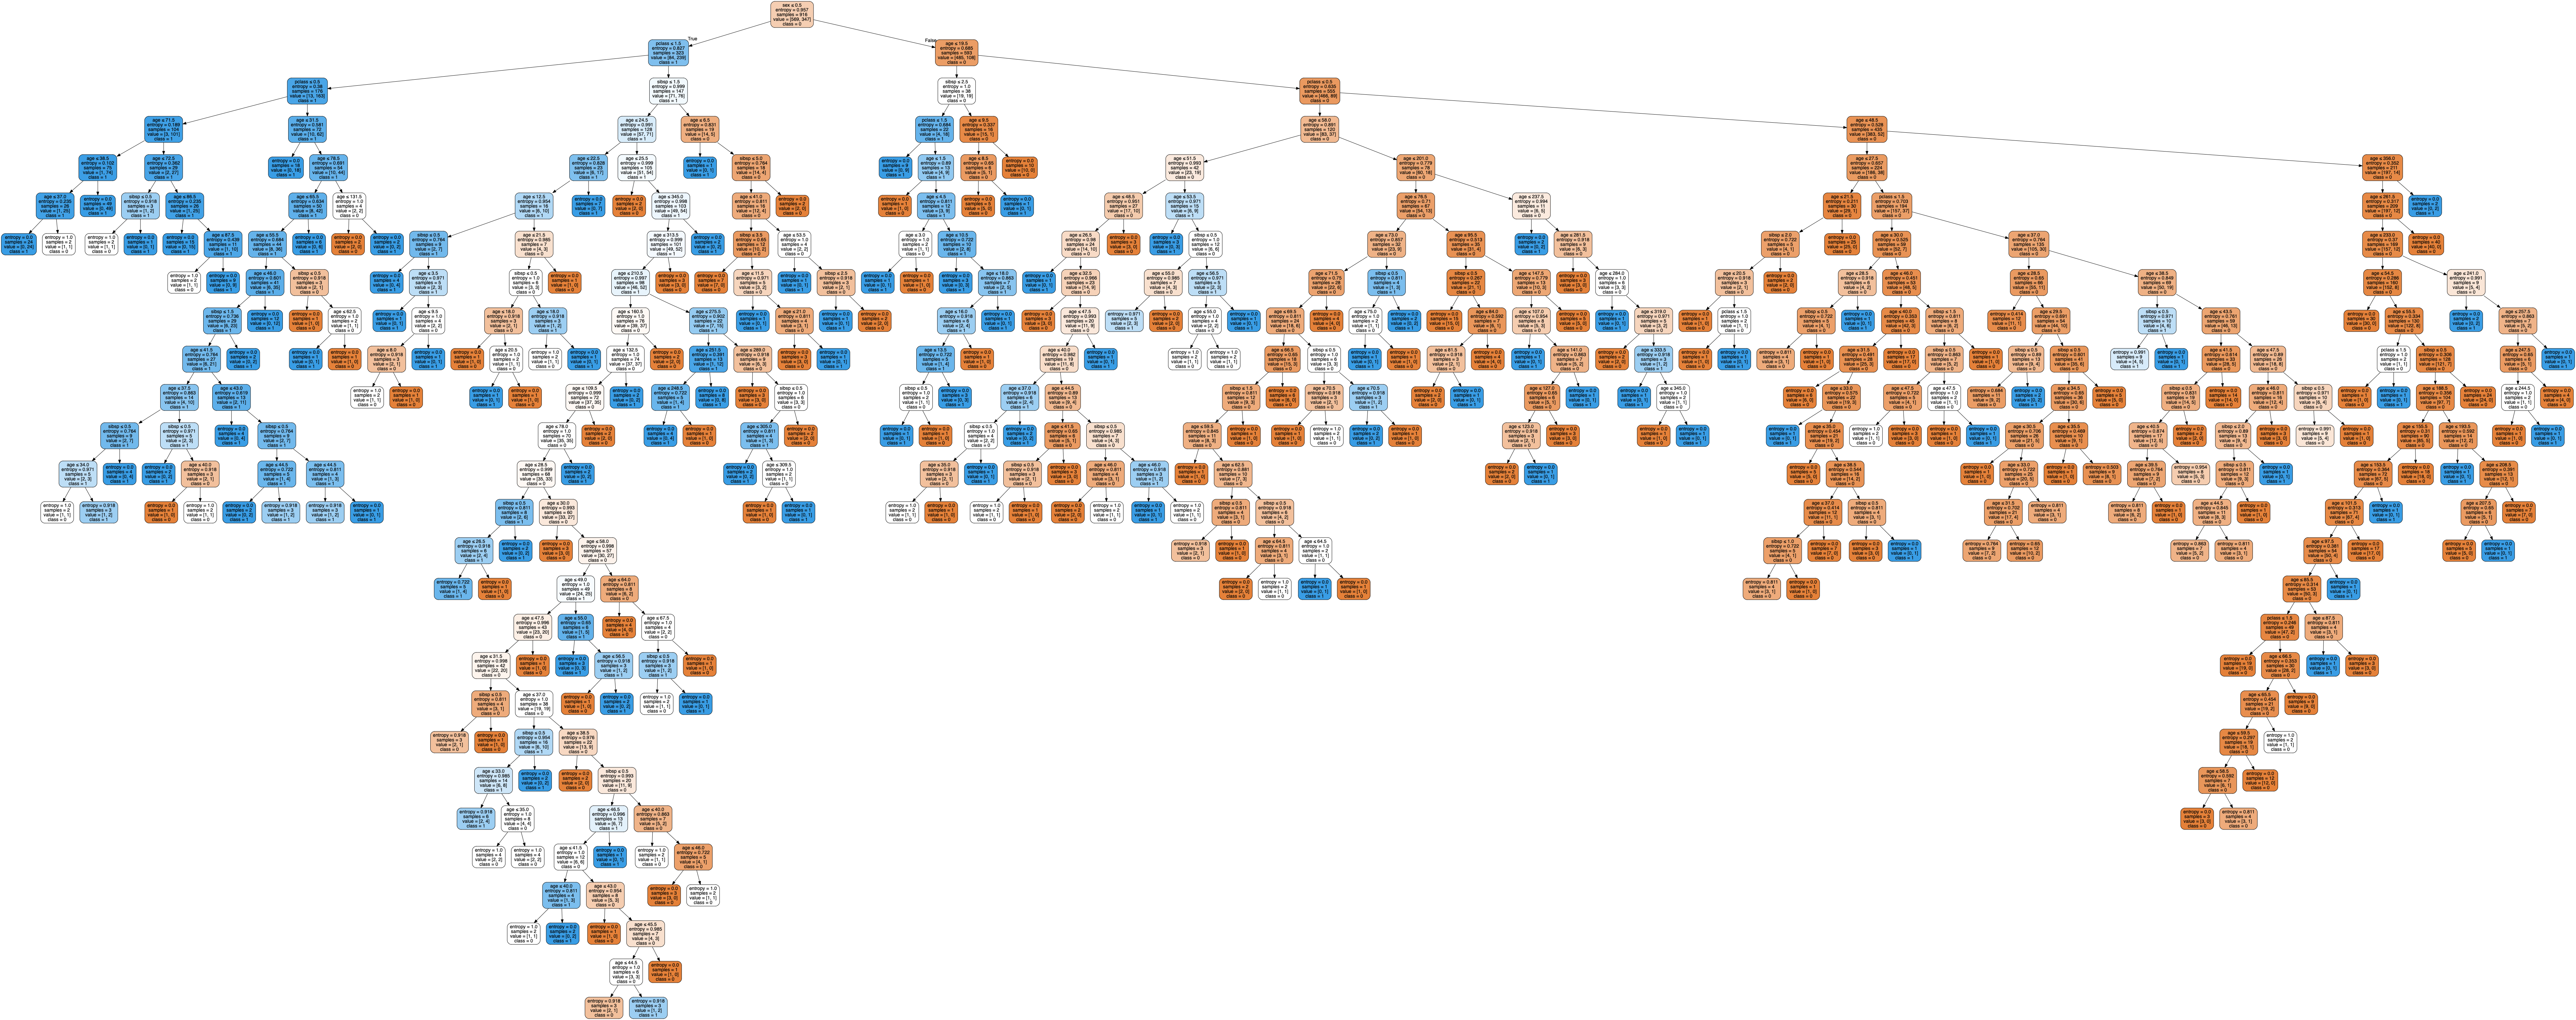

In [64]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('FullDecisionTree.png')
Image(graph.create_png())

### 3. print out the performance measures of the full model: in-sample and out-of-sample accuracy 
- in-sample percent survivors correctly predicted(on training set)

In [67]:
print("In Sample Survivors: ", metrics.accuracy_score(xtrain, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [916, 393]